## **2. Multi-class Classification Using Support Vector Machines**

**(a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics. uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29#. Choose 70% of the data randomly as the training set.**

In [0]:
import pandas as pd 
import numpy as np
from sklearn.datasets import make_multilabel_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,RandomizedSearchCV,KFold,GridSearchCV
from sklearn.svm import SVC
from numpy import random as rm
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [0]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving Frogs_MFCCs.csv to Frogs_MFCCs (3).csv
User uploaded file "Frogs_MFCCs.csv" with length 3181655 bytes


In [0]:
data=pd.read_csv('Frogs_MFCCs.csv')
data=data.drop(['RecordID'],axis=1)
data.head(5)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre


In [0]:
train1,test1=train_test_split(data,test_size=0.3)
xtrain=train1.drop(['Family','Genus',"Species"],axis=1)
ytrain=train1[['Family','Genus','Species']]
xtest=test1.drop(['Family','Genus',"Species"],axis=1)
ytest=test1[['Family','Genus','Species']]

**(b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-class classification is to train a classifier for each label. We first try this approach:
i. Research exact match and hamming score/ loss methods for evaluating multi- label classification and use them in evaluating the classifiers in this problem.**


In [0]:
def exact_match(yt,yp):
  sum=0
  for i in range(0,yt.shape[0]):
    if(yt.iloc[i,0]==yp.iloc[i,0] and yt.iloc[i,1]==yp.iloc[i,1] and yt.iloc[i,2]==yp.iloc[i,2]):
      sum=sum+1 
  return sum/(yt.shape[0]) 

In [0]:
def hamming_score(yt,yp):
  sum=0
  for i in range(0,yt.shape[0]):
    if(yt.iloc[i,0]!=yp.iloc[i,0]):
      sum=sum+1  
    if(yt.iloc[i,1]!=yp.iloc[i,1]):
      sum=sum+1
    if(yt.iloc[i,2]!=yp.iloc[i,2]):
      sum=sum+1
  return sum/(yt.shape[0]*yt.shape[1])    

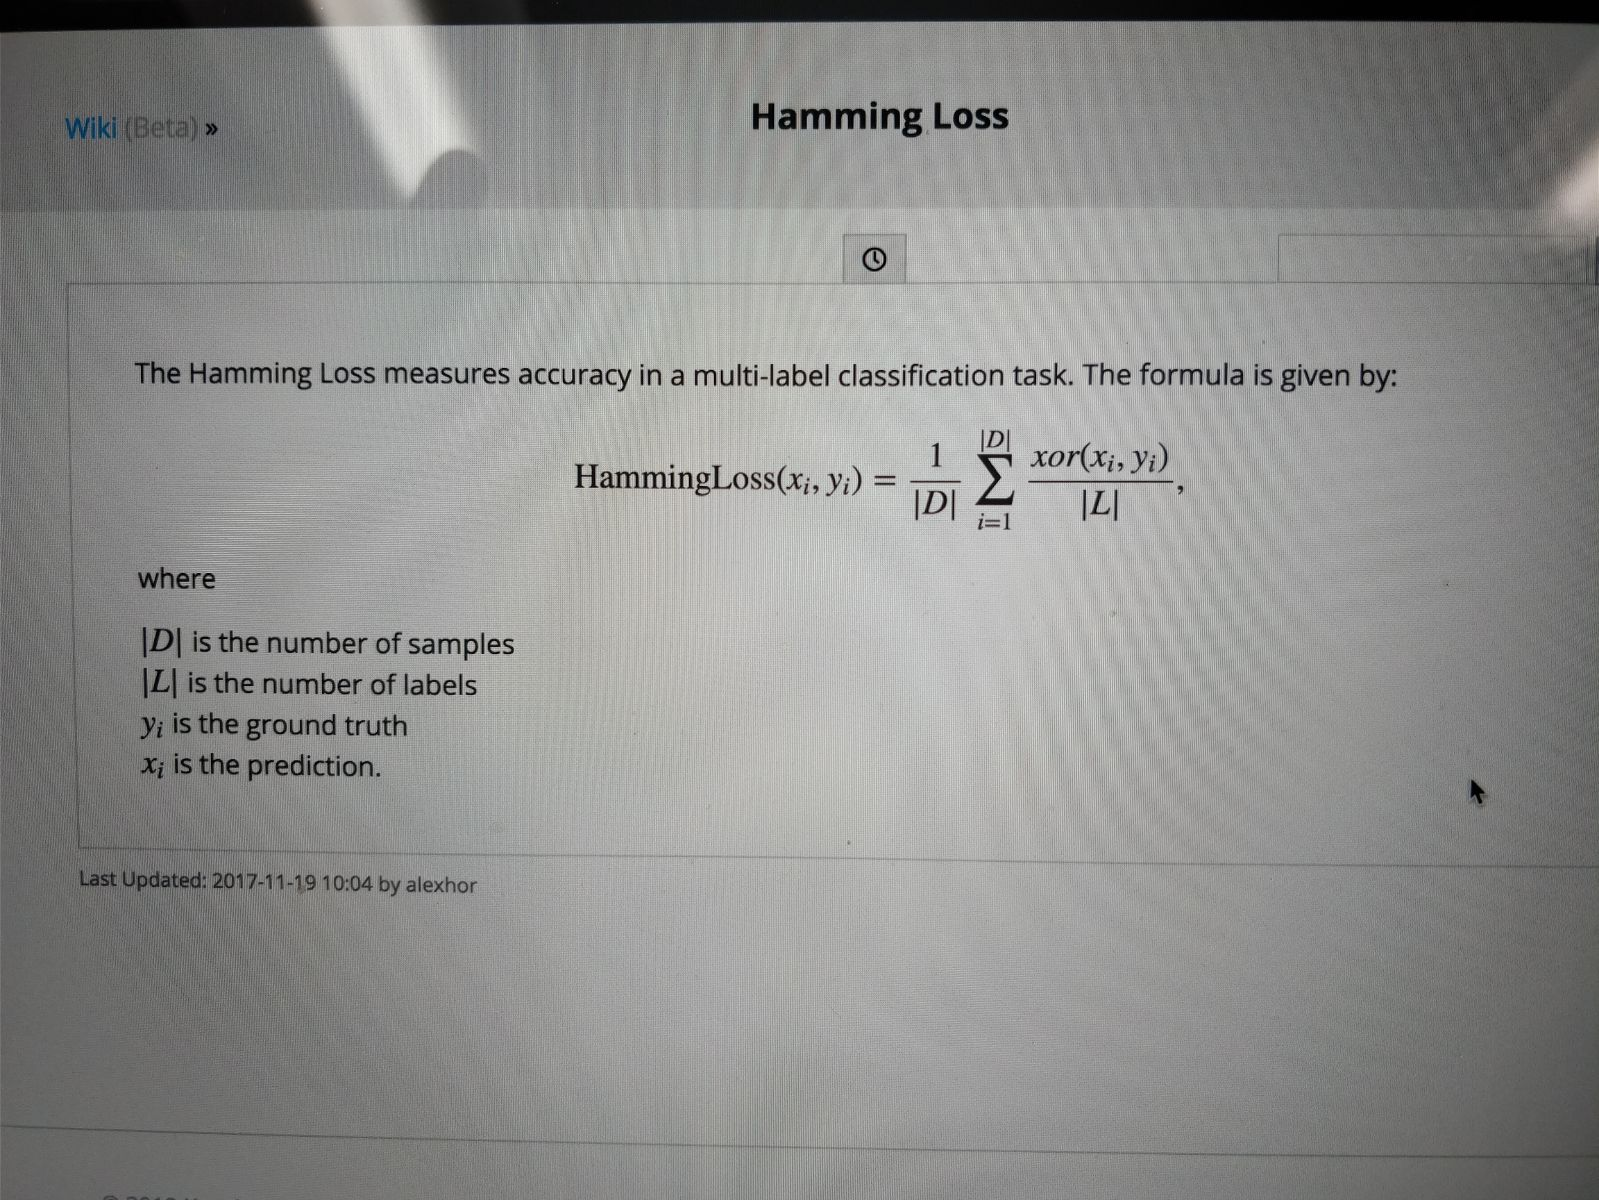

In [0]:
from IPython.display import Image, display; 
display(Image("drive/1.jpeg"))

Evaluation metrics for multi-label classification performance are inherently different from those used in multi-class (or binary) classification, due to the inherent differences of the classification problem.


**Hamming loss**: the fraction of the wrong labels to the total number of labels,
The closely related Jaccard index, also called Intersection over Union in the multi-label setting, is defined as the number of correctly predicted labels divided by the union of predicted and true labels.




**Precision, recall and f1-score**: precision is  the number of correct results divided by the number of all returned results,  recall is the number of correct results divided by the number of results that should have been returned and F1-Score is their harmonic mean.

**Exact match**: is the most strict metric, indicating the percentage of samples that have all their labels classified correctly.

**ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both normalized and raw attributes and report the results.**

In [0]:
C_range = 10. ** np.arange(-3, 8)
gamma_range = 10. ** np.arange(-5, 4)

param_grid = dict(gamma=gamma_range, C=C_range)
for column in ytrain.columns:
  model=SVC(kernel='rbf',decision_function_shape ='ovr')
  sv=GridSearchCV(model,param_grid,cv=10,verbose=True,n_jobs=20)
  sv.fit(xtrain1,ytrain[column])
  print(pd.DataFrame(sv.cv_results_).query('mean_train_score>0.75'))

Fitting 10 folds for each of 99 candidates, totalling 990 fits


[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:   29.2s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:  4.4min
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed: 10.9min
[Parallel(n_jobs=20)]: Done 760 tasks      | elapsed: 20.4min
[Parallel(n_jobs=20)]: Done 990 out of 990 | elapsed: 29.3min finished


    mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
12      14.392777         1.164060         0.834194          0.837106    0.01   
13      11.451740         0.954041         0.855441          0.856809    0.01   
20      13.843617         1.092198         0.835385          0.836378     0.1   
21       7.172770         0.657300         0.947577          0.949100     0.1   
22       5.606093         0.483807         0.974583          0.978268     0.1   
28      13.798606         1.079490         0.834591          0.835959       1   
29       7.428468         0.646480         0.936060          0.936877       1   
30       3.503742         0.332528         0.970413          0.972068       1   
31       3.874654         0.290166         0.988880          0.998279       1   
32      33.033901         1.112372         0.899325          1.000000       1   
33      53.833687         2.169345         0.656871          1.000000       1   
34      42.423245         1.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
12      14.588526         1.253959         0.784353          0.784463    0.01   
13      13.503158         1.032251         0.774623          0.775373    0.01   
20      14.093128         1.211568         0.783161          0.783581     0.1   
21       8.257827         0.795454         0.914416          0.915608     0.1   
22       7.721457         0.604053         0.950755          0.959183     0.1   
28      13.774198         1.190818         0.782764          0.782742       1   
29       8.139340         0.802648         0.918189          0.918476       1   
30       3.654189         0.443744         0.971803          0.977076       1   
31       5.606975         0.378766         0.983519          0.999051       1   
32      55.536902         1.160854         0.851271          1.000000       1   
33      91.509716         2.389717         0.615568          1.000000       1   
34      71.099337         1.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
13      16.650114         1.128433         0.808578          0.809284    0.01   
20      16.641689         1.348906         0.754766          0.754986     0.1   
21       7.515186         0.880219         0.923550          0.924919     0.1   
22       8.115935         0.631345         0.958102          0.968449     0.1   
28      16.617703         1.397746         0.756950          0.757149       1   
29       6.465983         0.886876         0.926728          0.927456       1   
30       2.857984         0.480543         0.972200          0.980496       1   
31       5.527115         0.398359         0.981732          0.998632       1   
32      41.968239         1.214829         0.825060          1.000000       1   
33      95.153021         2.495750         0.524226          1.000000       1   
34      75.138720         2.048345         0.489674          1.000000       1   
35      65.547079         1.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

In [0]:
C_range = 10. ** np.arange(1,5)
gamma_range = np.linspace(.1,.11,10)
df = pd.DataFrame(columns=ytrain.columns)
param_grid = dict(gamma=gamma_range, C=C_range)
for column in ytrain.columns:
  model=SVC(kernel='rbf',decision_function_shape ='ovr')
  sv=GridSearchCV(model,param_grid,cv=10,verbose=True,n_jobs=10)
  sv.fit(xtrain,ytrain[column])
  mod=sv.best_estimator_
  print("C= ",mod.C," Width:",1/2*(mod.gamma)," for ",column,)
  mod.fit(xtrain,ytrain[column])
  df[column]=mod.predict(xtest)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   10.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   54.0s
[Parallel(n_jobs=10)]: Done 400 out of 400 | elapsed:  2.0min finished


C=  1000.0  Width: 0.052222222222222225  for  Family
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   11.5s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   60.0s
[Parallel(n_jobs=10)]: Done 400 out of 400 | elapsed:  2.0min finished


C=  1000.0  Width: 0.05388888888888889  for  Genus
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    9.6s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   48.5s
[Parallel(n_jobs=10)]: Done 400 out of 400 | elapsed:  1.5min finished


C=  100.0  Width: 0.050555555555555555  for  Species


In [0]:
print(hamming_score(ytest,df))

0.017446348618187432


In [0]:
print(exact_match(ytest,df))

0.9749884205650764


The Attributes are already normalized. There is no need to run for normalized attributes.

**iii. Repeat 2(b)ii with L1-penalized SVMs. Remember to normalize the attributes.**

In [0]:
C_range = 10. ** np.arange(-3, 8)
param_grid = dict(C=C_range)
for column in ytrain.columns:
  model=LinearSVC(multi_class='ovr',penalty='l1',dual=False)
  sv=GridSearchCV(model,param_grid,cv=10,verbose=True,n_jobs=20)
  sv.fit(xtrain1,ytrain[column])
  print(column,pd.DataFrame(sv.cv_results_).query('mean_train_score>0.75'))

Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    1.3s
[Parallel(n_jobs=20)]: Done 110 out of 110 | elapsed:  2.7min finished


Family     mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
0        0.728952         0.024578         0.856831          0.856985   0.001   
1        4.616707         0.022056         0.927720          0.930258    0.01   
2       24.452155         0.013101         0.937847          0.939922     0.1   
3       36.275547         0.014805         0.937252          0.940517       1   
4       36.600315         0.018067         0.938443          0.940407      10   
5       36.545583         0.012577         0.938245          0.940407     100   
6       36.289839         0.010335         0.938245          0.940407    1000   
7       36.413225         0.013117         0.938245          0.940407   10000   
8       36.559298         0.015616         0.938245          0.940429  100000   
9       35.504742         0.011365         0.938245          0.940429   1e+06   
10      25.065611         0.004665         0.938245          0.940429   1e+07   

               param

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

Genus     mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
0        0.696054         0.022049         0.818904          0.819831   0.001   
1        6.171648         0.024796         0.914416          0.917020    0.01   
2       29.052847         0.016009         0.946386          0.948019     0.1   
3       51.460238         0.016131         0.956910          0.959183       1   
4       53.439248         0.021133         0.957506          0.960242      10   
5       53.217545         0.012681         0.957705          0.960286     100   
6       53.318954         0.019163         0.957705          0.960352    1000   
7       53.586865         0.017773         0.957705          0.960352   10000   
8       53.896571         0.011090         0.957705          0.960330  100000   
9       52.520747         0.013122         0.957705          0.960330   1e+06   
10      39.478012         0.004038         0.957705          0.960330   1e+07   

               params

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

Species     mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
0        1.326868         0.026947         0.781771          0.782676   0.001   
1        6.051155         0.025330         0.917990          0.919579    0.01   
2       28.920872         0.016058         0.956116          0.958411     0.1   
3       52.159160         0.013451         0.962669          0.968582       1   
4       55.316896         0.008568         0.963860          0.969420      10   
5       55.847714         0.014381         0.964456          0.969464     100   
6       56.567265         0.018273         0.964257          0.969464    1000   
7       56.616853         0.015788         0.964257          0.969464   10000   
8       57.350359         0.017809         0.964257          0.969464  100000   
9       56.311872         0.008279         0.964257          0.969464   1e+06   
10      40.603750         0.001336         0.964257          0.969464   1e+07   

               para

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

In [0]:
C_range = np.arange(10,110,10)
param_grid = dict(C=C_range)
df2 = pd.DataFrame(columns=ytrain.columns)
for column in ytrain.columns:
  model=LinearSVC(multi_class='ovr',penalty='l1',dual=False)
  sv=GridSearchCV(model,param_grid,cv=10,verbose=True,n_jobs=20)
  sv.fit(xtrain,ytrain[column])
  mod=sv.best_estimator_
  print("C=",mod.C," for ",column)
  mod.fit(xtrain,ytrain[column])
  df2[column]=mod.predict(xtest)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:   47.4s


In [0]:
print(hamming_score(ytest,df2))

0.052956615717153


In [0]:
print(exact_match(ytest,df2))

0.9157017137563687


**iv. Repeat 2(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.**

In [0]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE


Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (from imbalanced-learn)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (from imbalanced-learn)
Requirement already up-to-date: scipy in /usr/local/lib/python3.6/dist-packages (from imbalanced-learn)


In [0]:
C_range = 10. ** np.arange(-3, 8)
param_grid = dict(C=C_range)
sm_model=SMOTE(kind='svm') 
X_resampled = []
y_resampled = []
df1 = pd.DataFrame(columns=ytrain.columns)
for column in ytrain.columns:
  X_res, y_res = sm_model.fit_sample(xtrain, ytrain[column])
  X_resampled.append(X_res)
  y_resampled.append(y_res)
  model=LinearSVC(multi_class='ovr',penalty='l1',dual=False)
  sv=GridSearchCV(model,param_grid,cv=10,verbose=True,n_jobs=20)
  sv.fit(X_res,y_res)
  print(column,pd.DataFrame(sv.cv_results_).query('mean_train_score>0.75'))
  

Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    6.0s
[Parallel(n_jobs=20)]: Done 110 out of 110 | elapsed: 11.1min finished


('Family',     mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
1       34.893335         0.032424         0.859389          0.865543    0.01   
2       99.722676         0.029242         0.899460          0.906080     0.1   
3      139.193627         0.026138         0.910828          0.916758       1   
4      146.958542         0.035556         0.911957          0.918031      10   
5      147.746094         0.027556         0.912199          0.918084     100   
6      148.621752         0.024995         0.912199          0.918102    1000   
7      147.888741         0.029663         0.912199          0.918102   10000   
8      147.592887         0.029029         0.912199          0.918111  100000   
9      143.885273         0.020949         0.912199          0.918111   1e+06   
10     110.143392         0.009650         0.912199          0.918111   1e+07   

                params  rank_test_score  split0_test_score  \
1         {u'C': 0.01}             

[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:   28.7s
[Parallel(n_jobs=20)]: Done 110 out of 110 | elapsed: 32.4min finished


('Genus',     mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
1      197.980943         0.068114         0.858398          0.870113    0.01   
2      396.897257         0.048943         0.914996          0.921727     0.1   
3      436.086774         0.055784         0.925278          0.931153       1   
4      432.798517         0.044037         0.927164          0.932476      10   
5      401.368105         0.043487         0.927207          0.932548     100   
6      398.206279         0.047787         0.927207          0.932538    1000   
7      401.502712         0.051233         0.927207          0.932543   10000   
8      403.714269         0.041256         0.927164          0.932538  100000   
9      391.510534         0.036455         0.927164          0.932538   1e+06   
10     277.257027         0.014877         0.927207          0.932538   1e+07   

                params  rank_test_score  split0_test_score  \
1         {u'C': 0.01}              

[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:   29.1s
[Parallel(n_jobs=20)]: Done 110 out of 110 | elapsed: 38.3min finished


('Species',     mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
1      223.425206         0.057491         0.847253          0.859783    0.01   
2      400.266812         0.048420         0.894098          0.903982     0.1   
3      477.712376         0.041436         0.905697          0.915726       1   
4      497.013858         0.043890         0.905983          0.916193      10   
5      503.456735         0.043890         0.905942          0.916202     100   
6      496.287552         0.044234         0.905983          0.916153    1000   
7      491.151188         0.046580         0.905942          0.916157   10000   
8      494.299108         0.044773         0.906065          0.916166  100000   
9      490.772919         0.039253         0.906065          0.916166   1e+06   
10     376.874273         0.017006         0.906024          0.916180   1e+07   

                params  rank_test_score  split0_test_score  \
1         {u'C': 0.01}            

In [0]:
C_range = np.linspace(5,35,6)
param_grid = dict(C=C_range)
sm_model=SMOTE(kind='svm') 
X_resampled = []
y_resampled = []
df1 = pd.DataFrame(columns=ytrain.columns)
for column in ytrain.columns:
  X_res, y_res = sm_model.fit_sample(xtrain, ytrain[column])
  X_resampled.append(X_res)
  y_resampled.append(y_res)
  model=LinearSVC(multi_class='ovr',penalty='l1',dual=False)
  sv=GridSearchCV(model,param_grid,cv=10,verbose=True,n_jobs=20)
  sv.fit(X_res,y_res)
  mod=sv.best_estimator_
  print("C= ",mod.C," for ",column)
  mod.fit(X_res,y_res)
  df1[column]=mod.predict(xtest)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:  2.1min
[Parallel(n_jobs=20)]: Done  60 out of  60 | elapsed:  6.4min finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:  6.6min
[Parallel(n_jobs=20)]: Done  60 out of  60 | elapsed: 20.1min finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:  8.9min
[Parallel(n_jobs=20)]: Done  60 out of  60 | elapsed: 26.7min finished


In [0]:
print(hamming_score(ytest,df1))

0.09510575883896866


In [0]:
print(exact_match(ytest,df1))

0.8309402501157943


**Conclusion:**

It's been shown that the linear kernel with L1 penalty is a degenerate version of RBF, hence the linear kernel is never more accurate than a properly tuned RBF kernel.

This was also visible from evaluation metrics used on the Kernels.

The SMOTE trained model performed poorly on the Test data because it accounts for  class imbalance and uses over-sampling and under-sampling techiques.

It does not address the non-linearity of  class distribution. They are not linearly separable. So by introducing more samples the classes become less separable.Hence, the Gaussian Kernel performed best on the Data.

Also, the SMOTE trained model actually has better Precision and Recall towards the Imbalanced classes.